In [1]:
import pandas as pd               # Data manipulation
import numpy as np                # Numerical operations
import matplotlib.pyplot as plt   # Basic plotting
import seaborn as sns             # Enhanced statistical visualization
import missingno as msno          # Visualize missing data patterns
from datetime import datetime    # Date/time utilities
import plotly.io as pio
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
raw = pd.read_csv('data/phx_weather_2010_2023.csv')
raw['date'] = pd.to_datetime(raw['date'], format='%Y-%m-%d')
print(raw.info())
raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4992 entries, 0 to 4991
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   station_id              4992 non-null   int64         
 1   city_name               4992 non-null   object        
 2   date                    4992 non-null   datetime64[ns]
 3   season                  4992 non-null   object        
 4   avg_temp_c              4991 non-null   float64       
 5   min_temp_c              4992 non-null   float64       
 6   max_temp_c              4992 non-null   float64       
 7   precipitation_mm        4988 non-null   float64       
 8   snow_depth_mm           1944 non-null   float64       
 9   avg_wind_dir_deg        2257 non-null   float64       
 10  avg_wind_speed_kmh      4992 non-null   float64       
 11  peak_wind_gust_kmh      0 non-null      float64       
 12  avg_sea_level_pres_hpa  4852 non-null   float64 

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
0,72278,Phoenix,2010-01-01,Winter,12.5,5.0,20.0,0.0,NaN,NaN,5.0,NaN,1022.2,NaN
1,72278,Phoenix,2010-01-02,Winter,14.3,7.2,21.7,0.0,NaN,NaN,4.3,NaN,1017.4,NaN
2,72278,Phoenix,2010-01-03,Winter,13.6,5.6,21.7,0.0,NaN,NaN,3.6,NaN,1018.4,NaN
3,72278,Phoenix,2010-01-04,Winter,15.8,7.2,23.3,0.0,NaN,NaN,9.4,NaN,1018.4,NaN
4,72278,Phoenix,2010-01-05,Winter,14.7,7.2,22.8,0.0,NaN,NaN,2.2,NaN,1017.0,NaN


In [3]:
cols_to_drop = ['peak_wind_gust_kmh', 'sunshine_total_min', 'snow_depth_mm']
raw.drop(columns=cols_to_drop, inplace=True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4992 entries, 0 to 4991
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   station_id              4992 non-null   int64         
 1   city_name               4992 non-null   object        
 2   date                    4992 non-null   datetime64[ns]
 3   season                  4992 non-null   object        
 4   avg_temp_c              4991 non-null   float64       
 5   min_temp_c              4992 non-null   float64       
 6   max_temp_c              4992 non-null   float64       
 7   precipitation_mm        4988 non-null   float64       
 8   avg_wind_dir_deg        2257 non-null   float64       
 9   avg_wind_speed_kmh      4992 non-null   float64       
 10  avg_sea_level_pres_hpa  4852 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 429.1+ KB


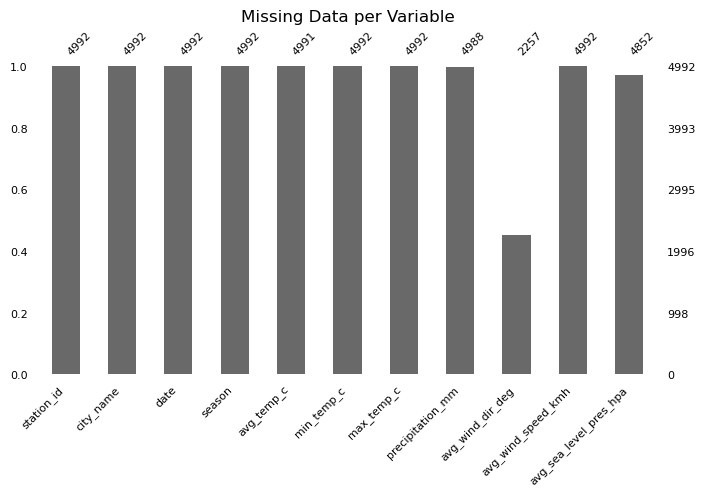

In [4]:
msno.bar(raw, figsize=(8, 4), fontsize=8)
plt.title("Missing Data per Variable")
plt.show()

In [5]:
mask = (raw['date'] >= '2018-09-01')
subset = raw.loc[mask]

missing_count = subset['avg_wind_dir_deg'].isna().sum()
print(f"Missing values for avg_wind_dir_deg since Sep 2018: {missing_count}")

Missing values for avg_wind_dir_deg since Sep 2018: 0


In [6]:
for col in ['avg_temp_c','precipitation_mm', 'avg_sea_level_pres_hpa']:
    raw[col] = raw[col].interpolate(method='spline', order=3)
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4992 entries, 0 to 4991
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   station_id              4992 non-null   int64         
 1   city_name               4992 non-null   object        
 2   date                    4992 non-null   datetime64[ns]
 3   season                  4992 non-null   object        
 4   avg_temp_c              4992 non-null   float64       
 5   min_temp_c              4992 non-null   float64       
 6   max_temp_c              4992 non-null   float64       
 7   precipitation_mm        4992 non-null   float64       
 8   avg_wind_dir_deg        2257 non-null   float64       
 9   avg_wind_speed_kmh      4992 non-null   float64       
 10  avg_sea_level_pres_hpa  4992 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 429.1+ KB


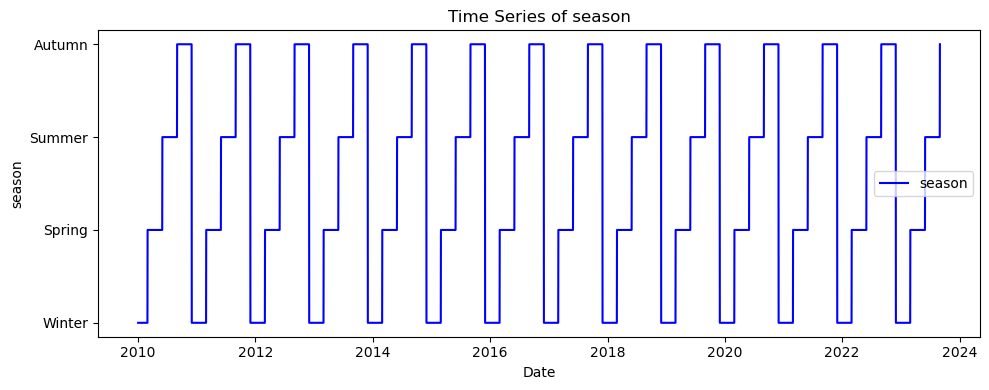

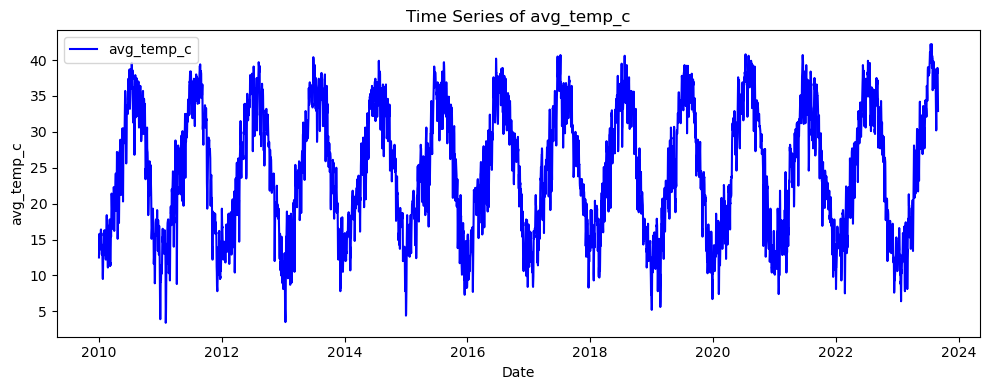

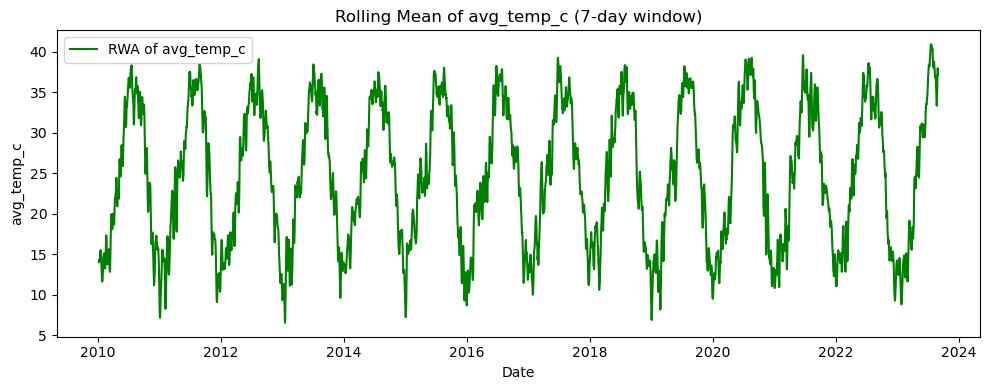

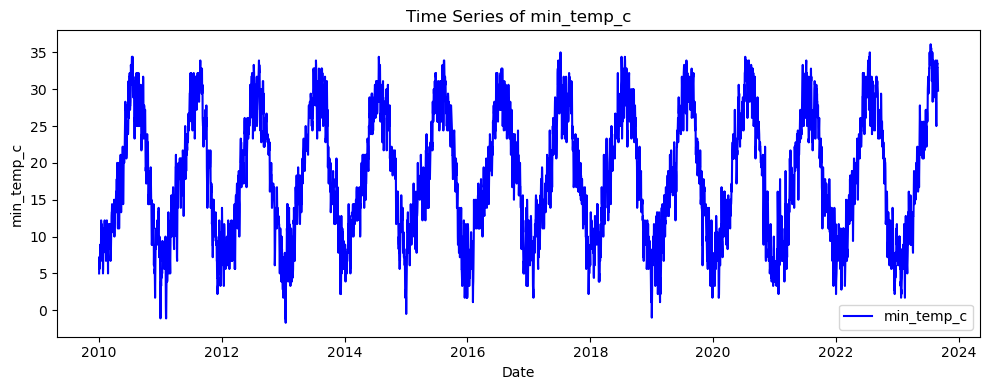

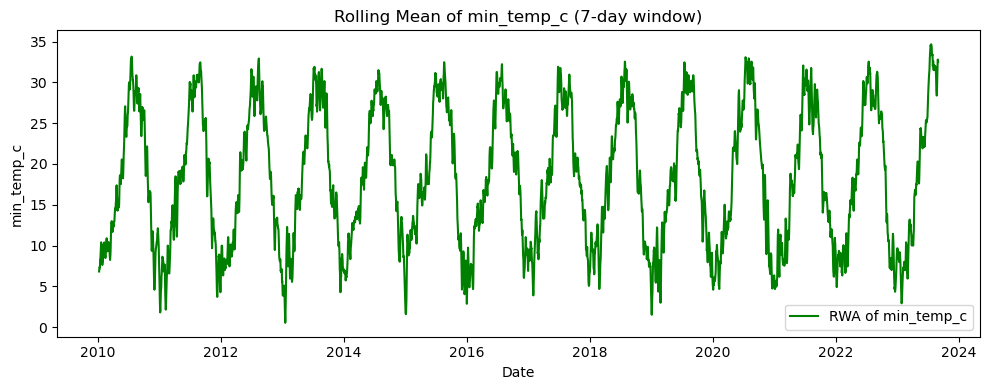

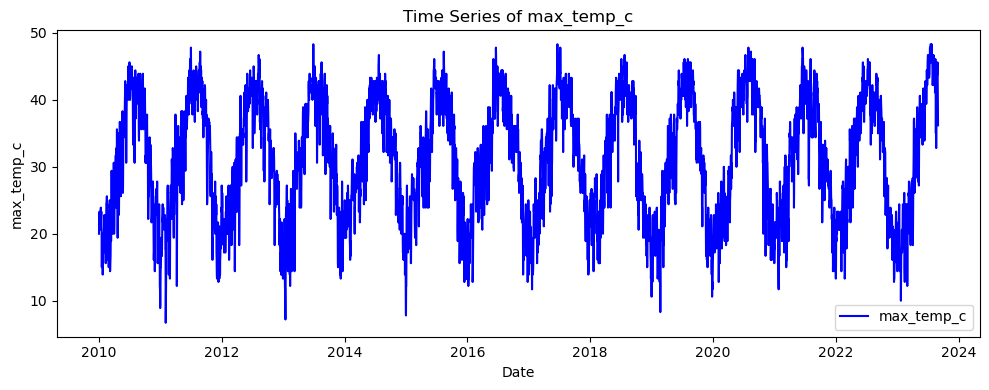

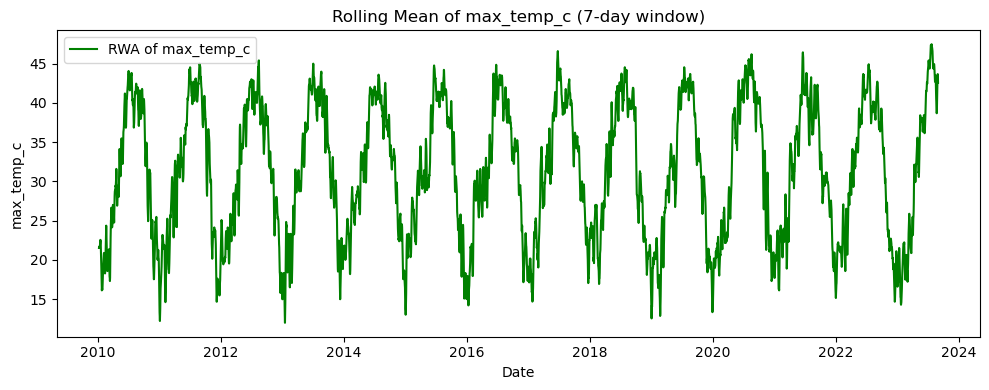

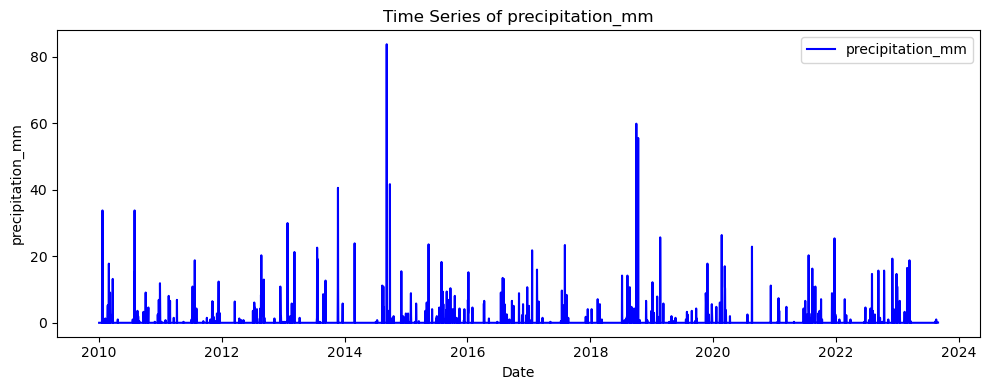

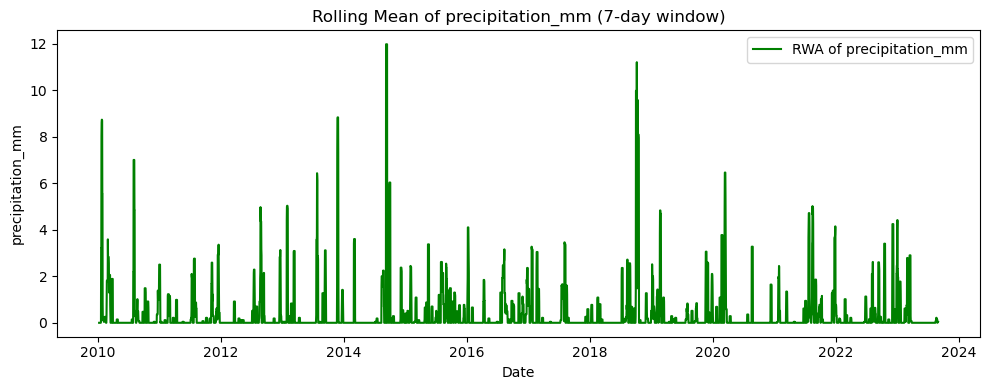

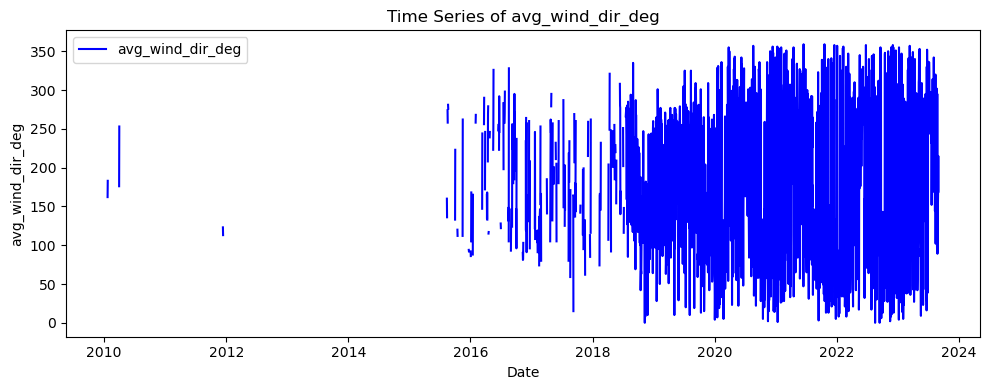

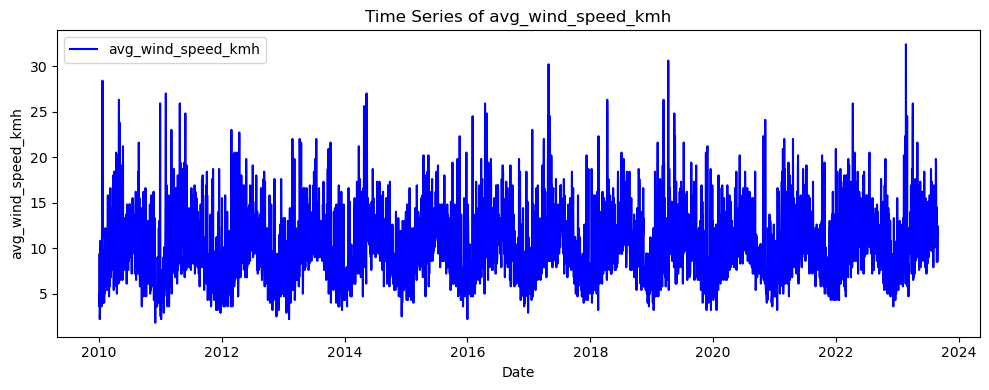

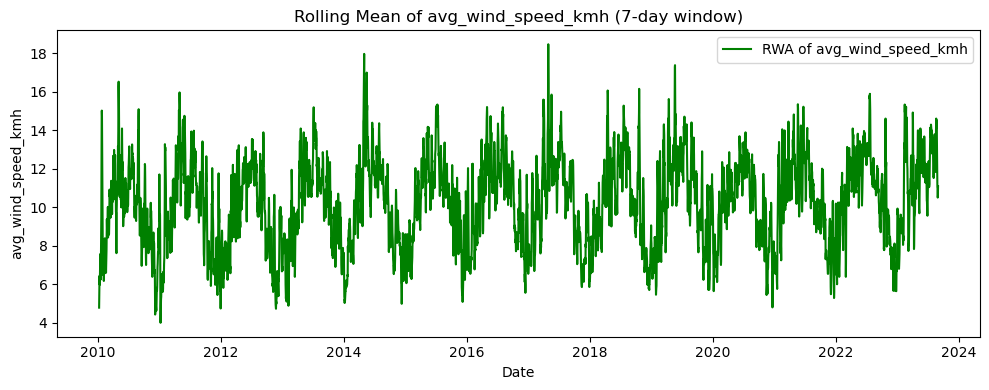

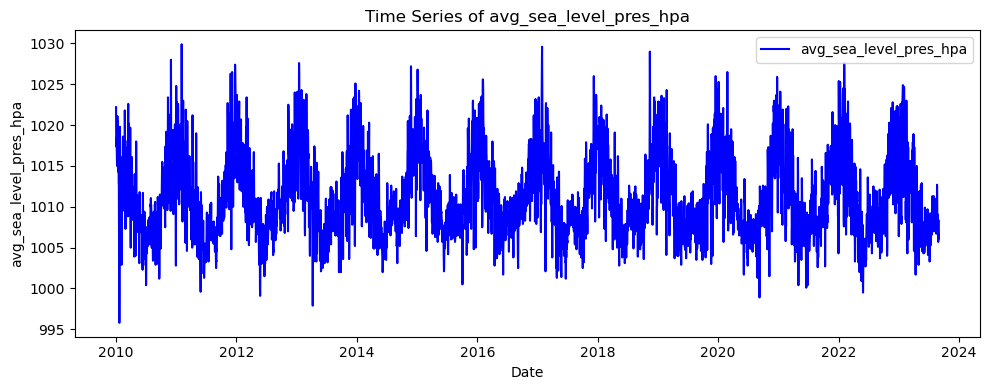

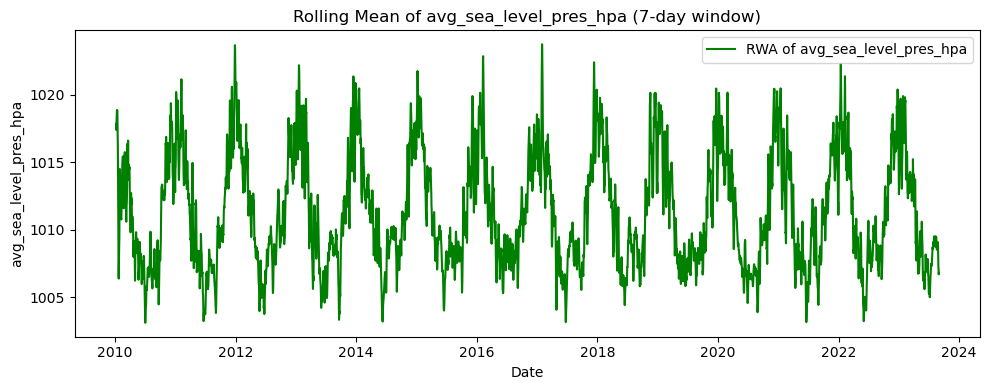

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,avg_wind_dir_deg,avg_wind_speed_kmh,avg_sea_level_pres_hpa,rwa_avg_temp_c,rwa_min_temp_c,rwa_max_temp_c,rwa_precipitation_mm,rwa_avg_wind_speed_kmh,rwa_avg_sea_level_pres_hpa
0,72278,Phoenix,2010-01-01,Winter,12.5,5.0,20.0,0.0,NaN,5.0,1022.200000,NaN,NaN,NaN,NaN,NaN,NaN
1,72278,Phoenix,2010-01-02,Winter,14.3,7.2,21.7,0.0,NaN,4.3,1017.400000,NaN,NaN,NaN,NaN,NaN,NaN
2,72278,Phoenix,2010-01-03,Winter,13.6,5.6,21.7,0.0,NaN,3.6,1018.400000,NaN,NaN,NaN,NaN,NaN,NaN
3,72278,Phoenix,2010-01-04,Winter,15.8,7.2,23.3,0.0,NaN,9.4,1018.400000,NaN,NaN,NaN,NaN,NaN,NaN
4,72278,Phoenix,2010-01-05,Winter,14.7,7.2,22.8,0.0,NaN,2.2,1017.000000,NaN,NaN,NaN,NaN,NaN,NaN
5,72278,Phoenix,2010-01-06,Winter,13.6,6.7,20.6,0.0,NaN,4.0,1016.300000,NaN,NaN,NaN,NaN,NaN,NaN
6,72278,Phoenix,2010-01-07,Winter,13.7,8.9,20.6,0.0,NaN,5.0,1015.000000,14.028571,6.828571,21.528571,0.0,4.785714,1017.814286
7,72278,Phoenix,2010-01-08,Winter,14.4,6.7,21.1,0.0,NaN,10.8,1019.300000,14.300000,7.071429,21.685714,0.0,5.614286,1017.400000
8,72278,Phoenix,2010-01-09,Winter,14.1,7.2,21.1,0.0,NaN,7.9,1021.100000,14.271429,7.071429,21.600000,0.0,6.128571,1017.928571
9,72278,Phoenix,2010-01-10,Winter,14.1,7.8,21.7,0.0,NaN,5.8,1019.400000,14.342857,7.385714,21.600000,0.0,6.442857,1018.071429


In [7]:
# pio.templates.default = "plotly_white"
# pio.renderers.default = 'browser'
# for col in raw.columns:
#     if col not in ['date', 'city_name', 'station_id']:
#         if col not in ['avg_wind_dir_deg', 'season']:
#             raw[f"rma_{col}"] = raw[col].rolling(window=30).mean()

#         # Plot the original time series
#         fig = px.line(raw, x="date", y=col, title=f"Time Series of {col}")
#         fig.update_layout(
#             plot_bgcolor="white",
#             paper_bgcolor="white",
#             font_color="black",
#             xaxis=dict(showline=True, linewidth=1, linecolor='black'),
#             yaxis=dict(showline=True, linewidth=1, linecolor='black')
#         )
#         fig.show()

#         # Plot rolling mean if applicable
#         if col not in ['avg_wind_dir_deg', 'season']:
#             df_filtered = raw[raw[f"rma_{col}"].notna()]
#             fig = px.line(df_filtered, x='date', y=f"rma_{col}", title=f"Rolling Mean of {col} (30-day window)")
#             fig.update_layout(
#                 plot_bgcolor="white",
#                 paper_bgcolor="white",
#                 font_color="black",
#                 xaxis=dict(showline=True, linewidth=1, linecolor='black'),
#                 yaxis=dict(showline=True, linewidth=1, linecolor='black')
#             )
#             fig.show()

for col in raw.columns:
    if col not in ['date', 'city_name', 'station_id']:
        if col not in ['avg_wind_dir_deg', 'season']:
            raw[f"rwa_{col}"] = raw[col].rolling(window=7).mean()

        # Plot original time series
        plt.figure(figsize=(10, 4))
        plt.plot(raw['date'], raw[col], color='blue', label=col)
        plt.title(f"Time Series of {col}")
        plt.xlabel("Date")
        plt.ylabel(col)
        plt.tight_layout()
        plt.legend()
        plt.show()

        # Plot rolling mean if applicable
        if col not in ['avg_wind_dir_deg', 'season']:
            df_filtered = raw[raw[f"rwa_{col}"].notna()]
            plt.figure(figsize=(10, 4))
            plt.plot(df_filtered['date'], df_filtered[f"rwa_{col}"], color='green', label=f"RWA of {col}")
            plt.title(f"Rolling Mean of {col} (7-day window)")
            plt.xlabel("Date")
            plt.ylabel(col)
            plt.tight_layout()
            plt.legend()
            plt.show()
raw.head(15)

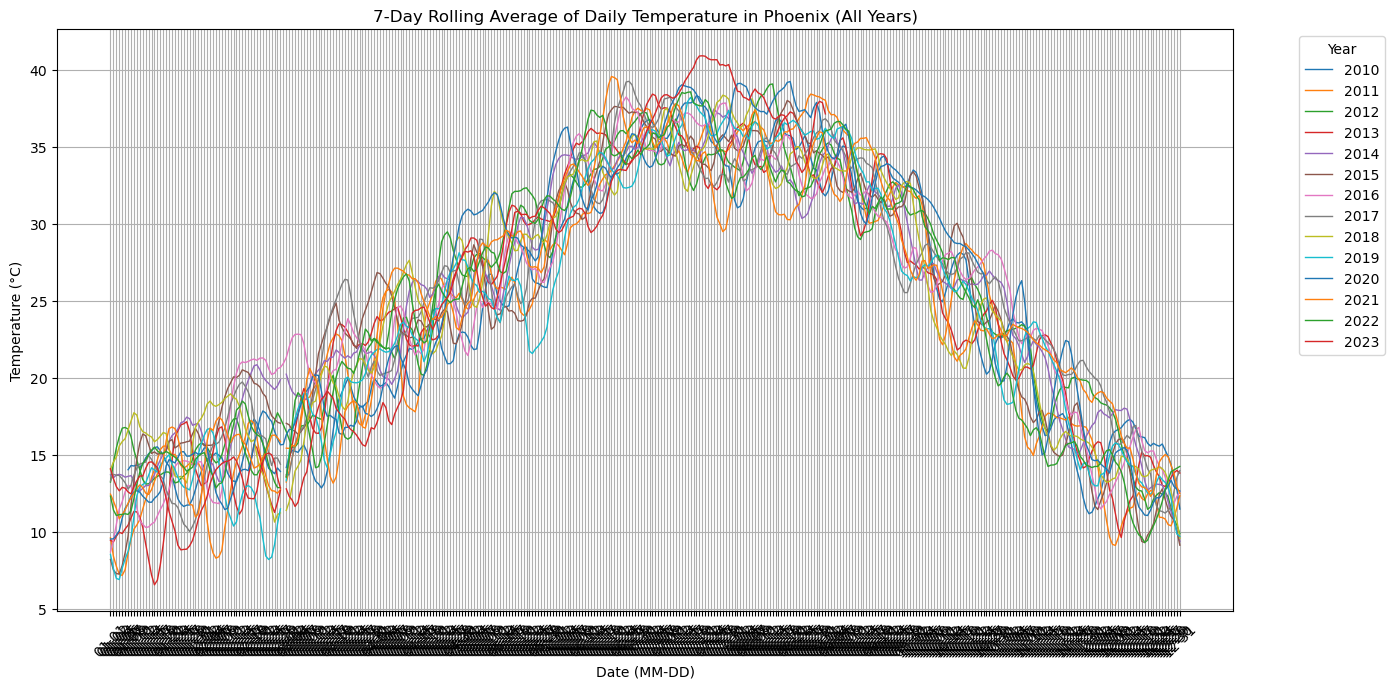

In [8]:
df = raw.dropna(subset=['rwa_avg_temp_c']).copy()

df['year'] = df['date'].dt.year
df['month_day'] = df['date'].dt.strftime('%m-%d')

# Pivot so that each year becomes a line
pivot_rwa = df.pivot(index='month_day', columns='year', values='rwa_avg_temp_c')

# Plot
plt.figure(figsize=(14, 7))
for year in pivot_rwa.columns:
    plt.plot(pivot_rwa.index, pivot_rwa[year], label=str(year), linewidth=1)

plt.title("7-Day Rolling Average of Daily Temperature in Phoenix (All Years)")
plt.xlabel("Date (MM-DD)")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

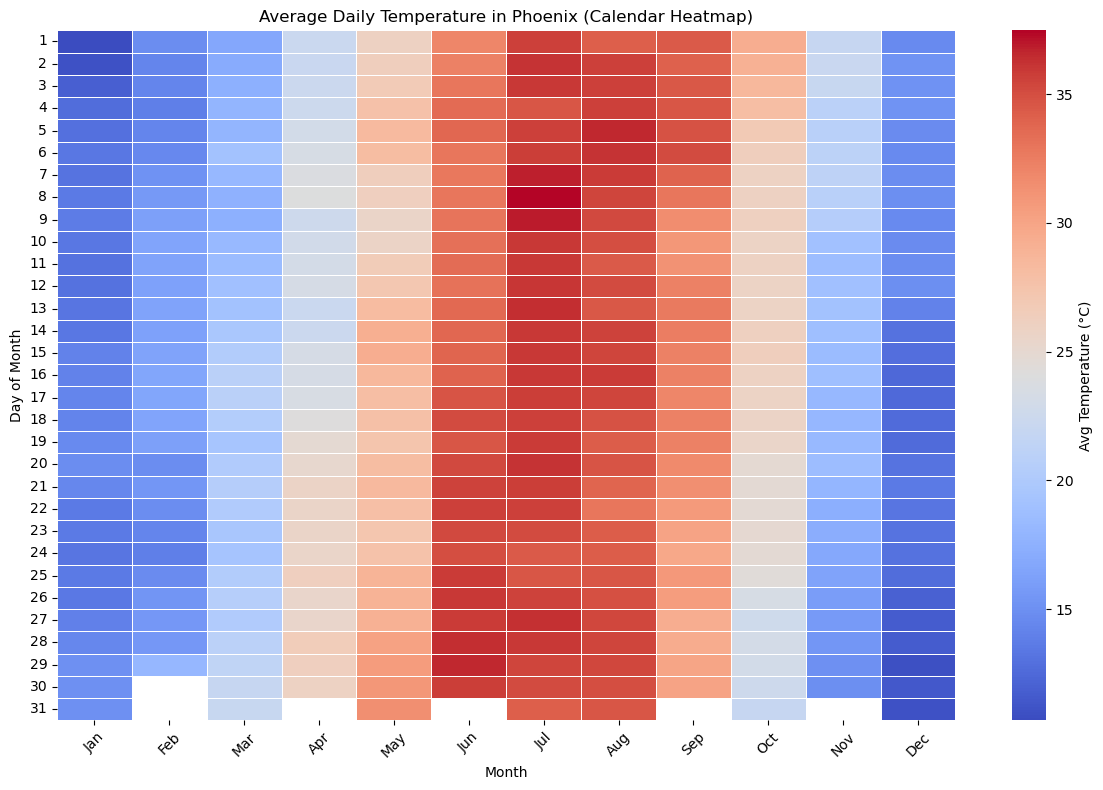

In [9]:
raw['month'] = raw['date'].dt.month
raw['day'] = raw['date'].dt.day

# Group by month and day, then average temperature across all years
monthly_avg = raw.groupby(['month', 'day'])['avg_temp_c'].mean().unstack(level=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_avg, cmap="coolwarm", linewidths=0.5, cbar_kws={'label': 'Avg Temperature (°C)'})

# Formatting axes
plt.title("Average Daily Temperature in Phoenix (Calendar Heatmap)")
plt.xlabel("Month")
plt.ylabel("Day of Month")
plt.xticks(ticks=[i + 0.5 for i in range(12)], labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [10]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4992 entries, 0 to 4991
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   station_id                  4992 non-null   int64         
 1   city_name                   4992 non-null   object        
 2   date                        4992 non-null   datetime64[ns]
 3   season                      4992 non-null   object        
 4   avg_temp_c                  4992 non-null   float64       
 5   min_temp_c                  4992 non-null   float64       
 6   max_temp_c                  4992 non-null   float64       
 7   precipitation_mm            4992 non-null   float64       
 8   avg_wind_dir_deg            2257 non-null   float64       
 9   avg_wind_speed_kmh          4992 non-null   float64       
 10  avg_sea_level_pres_hpa      4992 non-null   float64       
 11  rwa_avg_temp_c              4986 non-null   float64     

In [11]:
valid_cols = [col for col in raw.columns 
              if col not in ['station_id', 'city_name', 'season', 'avg_wind_dir_deg']]

# Select the first n of those
selected_cols = valid_cols[:7]

# Create new DataFrame with just those columns
decomposables = raw[selected_cols].copy()
decomposables.dropna(inplace=True)
decomposables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4992 entries, 0 to 4991
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    4992 non-null   datetime64[ns]
 1   avg_temp_c              4992 non-null   float64       
 2   min_temp_c              4992 non-null   float64       
 3   max_temp_c              4992 non-null   float64       
 4   precipitation_mm        4992 non-null   float64       
 5   avg_wind_speed_kmh      4992 non-null   float64       
 6   avg_sea_level_pres_hpa  4992 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 273.1 KB


In [12]:
for col in decomposables.columns:
    result = seasonal_decompose(decomposables[col], model='additive', period=365)

    fig = make_subplots(
        rows=4, cols=1,
        shared_xaxes=True,
        subplot_titles=[f"{col} - Observed", "Trend", "Seasonal", "Residual"],
        vertical_spacing=0.05
    )

    fig.add_trace(go.Scatter(x=result.observed.index, y=result.observed, name="Observed"), row=1, col=1)
    fig.add_trace(go.Scatter(x=result.trend.index, y=result.trend, name="Trend"), row=2, col=1)
    fig.add_trace(go.Scatter(x=result.seasonal.index, y=result.seasonal, name="Seasonal"), row=3, col=1)
    fig.add_trace(go.Scatter(x=result.resid.index, y=result.resid, name="Residual"), row=4, col=1)

    fig.update_layout(
        height=800,
        title_text=f"Seasonal Decomposition of {col}",
        showlegend=False,
        template='plotly_white'
    )

    fig.show()

In [20]:
data_to_save = raw[raw['date']>= '2010-01-07']
data_to_save.to_csv('data/phx_weather_cleaned.csv', index=False)
data_to_save.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4986 entries, 6 to 4991
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   station_id                  4986 non-null   int64         
 1   city_name                   4986 non-null   object        
 2   date                        4986 non-null   datetime64[ns]
 3   season                      4986 non-null   object        
 4   avg_temp_c                  4986 non-null   float64       
 5   min_temp_c                  4986 non-null   float64       
 6   max_temp_c                  4986 non-null   float64       
 7   precipitation_mm            4986 non-null   float64       
 8   avg_wind_dir_deg            2257 non-null   float64       
 9   avg_wind_speed_kmh          4986 non-null   float64       
 10  avg_sea_level_pres_hpa      4986 non-null   float64       
 11  rwa_avg_temp_c              4986 non-null   float64       
 1